In [7]:
# Import Google Colab utility methods
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import re
from imblearn.over_sampling import RandomOverSampler

In [9]:
PATH = "/content/drive/MyDrive/09 - Data Science - AUEB/Course - Data Science Challenge"

df_train, df_test = [pd.read_csv(f) for f in [f'{PATH}/df_train.csv', f'{PATH}/df_test.csv']]

In [10]:
from sklearn.model_selection import train_test_split

X_features = [
    'price_na', 'core_number', 'community', 'ego_size',
    'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15'
]

X = df_train[X_features]
y = df_train['pid_categ']

# Oversample minority classes
ros = RandomOverSampler(sampling_strategy={9: 6000, 13: 6000, 14:6000, 15:6000}, random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Split the original training set to train/validation sets with 80/20
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=28, stratify=y_res)

* Logistic regression (baseline)

In [5]:
from sklearn.linear_model import LogisticRegression

# Logistic regression classifier
lr_clf = LogisticRegression(C=10, max_iter=1000, solver='saga', random_state=42)

# Fit the Logistic regression classifier to training data
lr_clf.fit(X_train, y_train)

# Predict the class (category) of products in the validation set
y_pred_lr = lr_clf.predict(X_val)
# Predict the probabilities of classes (categories) of products in the validation set
y_pred_proba_lr = lr_clf.predict_proba(X_val)
# Predict the class (category) of products in the test set
X_test_lr = df_test[X_features]
# Predict the probabilities of classes (categories) of products in the validation set
y_test_lr = lr_clf.predict_proba(X_test_lr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Evaluation of Logistic regression classifier
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("\nLogistic Regression Report:\n", classification_report(y_val, y_pred_lr))
print("Logistic Regression Log Loss:", log_loss(y_val, y_pred_proba_lr))

Logistic Regression Accuracy: 0.6098655845802688

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.63      0.82      0.71      3033
           1       0.61      0.49      0.54      2372
           2       0.49      0.80      0.61      8652
           3       0.82      0.69      0.75      1073
           4       0.59      0.39      0.47      3016
           5       0.69      0.60      0.64      3565
           6       0.78      0.56      0.65      1519
           7       0.77      0.78      0.77      3752
           8       0.69      0.55      0.61      1316
           9       0.76      0.59      0.66      1200
          10       0.53      0.31      0.39      3589
          11       0.68      0.40      0.50      1425
          12       0.70      0.25      0.36      1318
          13       0.74      0.59      0.66      1200
          14       0.80      0.63      0.70      1200
          15       0.68      0.58      0.62      1200

 

* XGboost classifier

In [12]:
import xgboost as xgb

# XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    tree_method = "hist",
    device = "cuda",
    subsample=0.8,
    n_estimators=600,
    min_child_weight=3,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
)

# Fit the XGBoost classifier to training data
xgb_clf.fit(X_train, y_train)

# Predict the class (category) of products in the validation set
y_pred_xgb = xgb_clf.predict(X_val)
# Predict the probabilities of classes (categories) of products in the validation set
y_pred_proba_xgb = xgb_clf.predict_proba(X_val)
# Predict the class (category) of products in the test set
X_test_xgboost = df_test[X_features]
# Predict the probabilities of classes (categories) of products in the validation set
y_test_xgboost = xgb_clf.predict_proba(X_test_xgboost)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Evaluation of XGBoost classifier
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("XGBoost Log Loss:", log_loss(y_val, y_pred_proba_xgb))

XGBoost Accuracy: 0.8956885620086229

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3033
           1       0.85      0.79      0.82      2372
           2       0.88      0.92      0.90      8652
           3       0.96      0.95      0.95      1073
           4       0.89      0.91      0.90      3016
           5       0.93      0.94      0.94      3565
           6       0.94      0.91      0.92      1519
           7       0.92      0.89      0.91      3752
           8       0.93      0.91      0.92      1316
           9       0.92      0.91      0.91      1200
          10       0.79      0.80      0.79      3589
          11       0.84      0.82      0.83      1425
          12       0.85      0.74      0.79      1318
          13       0.92      0.96      0.94      1200
          14       0.97      0.99      0.98      1200
          15       0.96      0.97      0.97      1200

    accura

* Random Forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Fit the Random Forest classifier to training data
rf_clf.fit(X_train, y_train)

# Predict the class (category) of products in the validation set
y_pred_rf = rf_clf.predict(X_val)
# Predict the probabilities of classes (categories) of products in the validation set
y_pred_proba_rf = rf_clf.predict_proba(X_val)
# Predict the class (category) of products in the test set
X_test_rf = df_test[X_features]
# Predict the probabilities of classes (categories) of products in the validation set
y_test_rf = rf_clf.predict_proba(X_test_rf)

In [10]:
# Evaluation of Random Forest classifier
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Random Forest Log Loss:", log_loss(y_val, y_pred_proba_rf))

Random Forest Accuracy: 0.7906416434187167

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      3033
           1       0.78      0.69      0.73      2372
           2       0.83      0.69      0.75      8652
           3       0.89      0.93      0.91      1073
           4       0.88      0.87      0.88      3016
           5       0.88      0.86      0.87      3565
           6       0.86      0.83      0.84      1519
           7       0.93      0.82      0.87      3752
           8       0.70      0.83      0.76      1316
           9       0.80      0.84      0.82      1200
          10       0.58      0.65      0.61      3589
          11       0.70      0.68      0.69      1425
          12       0.65      0.80      0.71      1318
          13       0.76      0.88      0.82      1200
          14       0.94      0.95      0.94      1200
          15       0.60      0.95      0.73      1200

In [11]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.4 MB/s eta 0:00:00


In [12]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Create Catboost classifier
catboost_clf = CatBoostClassifier(
    iterations=600,
    depth=9,
    learning_rate=0.2,
    random_state=42,
    verbose=100
)

# Fit Catboost classifier
catboost_clf.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)

# Make predictions
y_pred_catboost = catboost_clf.predict(X_val)
y_pred_proba_catboost = catboost_clf.predict_proba(X_val)

0:	learn: 1.9476977	test: 1.9519160	best: 1.9519160 (0)	total: 308ms	remaining: 3m 4s
100:	learn: 0.4430846	test: 0.4721921	best: 0.4721921 (100)	total: 24.7s	remaining: 2m 2s
200:	learn: 0.3749497	test: 0.4218031	best: 0.4218031 (200)	total: 48.9s	remaining: 1m 37s
300:	learn: 0.3358384	test: 0.3992452	best: 0.3992452 (300)	total: 1m 13s	remaining: 1m 12s
400:	learn: 0.3090979	test: 0.3863722	best: 0.3863722 (400)	total: 1m 37s	remaining: 48.4s
500:	learn: 0.2870009	test: 0.3777327	best: 0.3777327 (500)	total: 2m 1s	remaining: 24s
599:	learn: 0.2680831	test: 0.3707253	best: 0.3707253 (599)	total: 2m 25s	remaining: 0us

bestTest = 0.3707252627
bestIteration = 599



In [13]:
# Evaluation of Catboost classifier
print("\nCatBoost Accuracy:", accuracy_score(y_val, y_pred_catboost))
print("\nCatBoost Classification Report:\n", classification_report(y_val, y_pred_catboost))
print("CatBoost Log Loss:", log_loss(y_val, y_pred_proba_catboost))


CatBoost Accuracy: 0.8916307380167385

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3033
           1       0.84      0.79      0.82      2372
           2       0.88      0.92      0.90      8652
           3       0.95      0.94      0.95      1073
           4       0.88      0.91      0.90      3016
           5       0.93      0.94      0.93      3565
           6       0.94      0.90      0.92      1519
           7       0.92      0.89      0.90      3752
           8       0.94      0.91      0.93      1316
           9       0.93      0.88      0.90      1200
          10       0.79      0.79      0.79      3589
          11       0.82      0.82      0.82      1425
          12       0.86      0.72      0.78      1318
          13       0.89      0.93      0.91      1200
          14       0.96      0.98      0.97      1200
          15       0.96      0.96      0.96      1200

    acc

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

df_train['pid_desc_tfidf'] = df_train['pid_desc_tfidf'].fillna('')

X_desc = df_train[['pid_desc_tfidf']]
y_desc = df_train['pid_categ']

# Oversample
ros = RandomOverSampler(sampling_strategy={9: 6000, 13: 6000, 14:6000, 15:6000}, random_state=42)
X_res_desc, y_res_desc = ros.fit_resample(X_desc, y_desc)

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X_res_desc['pid_desc_tfidf'], y_res_desc,
    test_size=0.2, random_state=28, stratify=y_res_desc
)

# Fit TF-IDF only on training set
vec = TfidfVectorizer(
    decode_error='ignore',
    token_pattern=r'\b[a-zA-Z]{2,}\b',
    strip_accents='unicode',
    min_df=5,
    max_features=20000,
    stop_words='english',
    ngram_range=(1, 2)
)

X_train_tfidf = vec.fit_transform(X_train)
X_val_tfidf = vec.transform(X_val)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, log_loss

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Fit TF-IDF on training data, transform both train and val
vectorizer = TfidfVectorizer(
    decode_error='ignore',
    token_pattern=r'\b[a-zA-Z]{2,}\b',
    strip_accents='unicode',
    min_df=5,
    max_features=20000,
    stop_words='english',
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()

num_classes = len(np.unique(y_train))
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_val_cat = keras.utils.to_categorical(y_val, num_classes)

# Compute weights for each class
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Build the model
model = keras.Sequential([
    layers.Input(shape=(X_train_dense.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_dense, y_train_cat,
    validation_data=(X_val_dense, y_val_cat),
    epochs=20,
    batch_size=16,
    callbacks=[early_stop],
    verbose=2,
    class_weight=class_weight_dict
)

# Predictions and evaluation
y_pred_proba_nn = model.predict(X_val_dense)
y_pred_nn = np.argmax(y_pred_proba_nn, axis=1)

print("NN (TF-IDF) Accuracy:", accuracy_score(y_val, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_val, y_pred_nn))
print("Log Loss:", log_loss(y_val, y_pred_proba_nn))

Epoch 1/20
9858/9858 - 47s - 5ms/step - accuracy: 0.8295 - loss: 0.5213 - val_accuracy: 0.9023 - val_loss: 0.3334
Epoch 2/20
9858/9858 - 32s - 3ms/step - accuracy: 0.8986 - loss: 0.2770 - val_accuracy: 0.9136 - val_loss: 0.3012
Epoch 3/20
9858/9858 - 32s - 3ms/step - accuracy: 0.9208 - loss: 0.1998 - val_accuracy: 0.9087 - val_loss: 0.3081
Epoch 4/20
9858/9858 - 32s - 3ms/step - accuracy: 0.9324 - loss: 0.1594 - val_accuracy: 0.9176 - val_loss: 0.3002
Epoch 5/20
9858/9858 - 32s - 3ms/step - accuracy: 0.9427 - loss: 0.1311 - val_accuracy: 0.9190 - val_loss: 0.3279
Epoch 6/20
9858/9858 - 32s - 3ms/step - accuracy: 0.9497 - loss: 0.1141 - val_accuracy: 0.9213 - val_loss: 0.3270
Epoch 7/20
9858/9858 - 32s - 3ms/step - accuracy: 0.9548 - loss: 0.1034 - val_accuracy: 0.9246 - val_loss: 0.3322
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
NN (TF-IDF) Accuracy: 0.9175500887648999

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97     

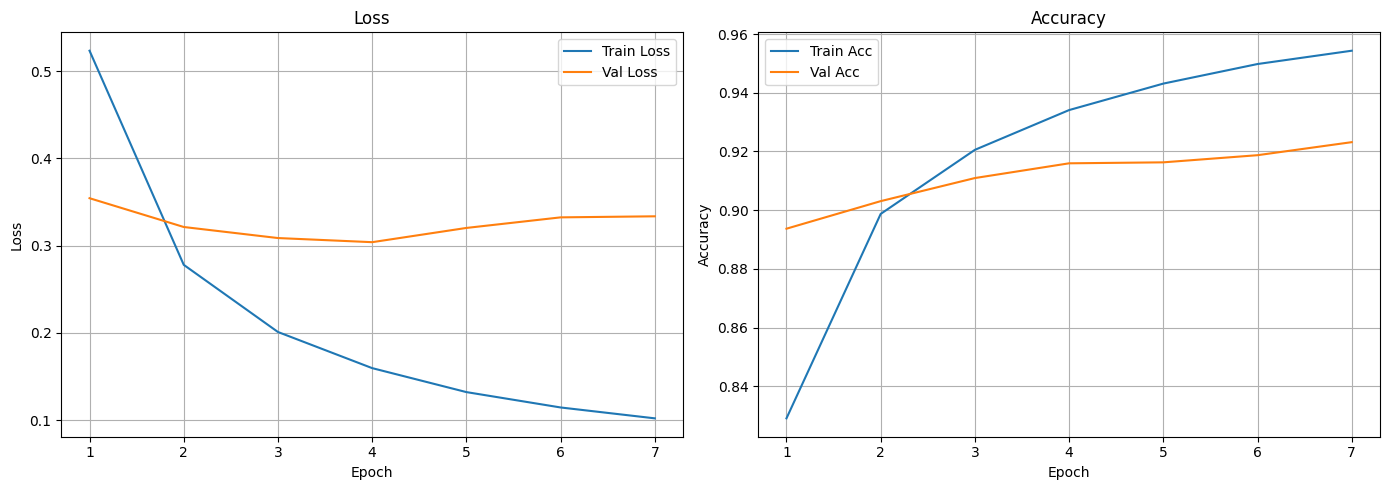

In [23]:
import matplotlib.pyplot as plt

# Get the number of epochs trained
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Train Acc')
plt.plot(epochs, history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

* Ensemble learning 1: Soft-voting

In [46]:
X_all_tabular  = df_train[X_features]
X_all_tfidf = vectorizer.transform(df_train['pid_desc_tfidf']).toarray()

# XGBoost probabilities
y_pred_proba_xgb_all = xgb_clf.predict_proba(X_all_tabular)

# NN (TF-IDF) probabilities
y_pred_proba_nn_all = model.predict(X_all_tfidf)

# Simple average
ensemble_proba_all = (y_pred_proba_xgb_all*0.25 + y_pred_proba_nn_all*0.75)
ensemble_proba_all = ensemble_proba_all / ensemble_proba_all.sum(axis=1, keepdims=True)

y_true = df_train['pid_categ']
y_pred_ens = np.argmax(ensemble_proba_all, axis=1)

5688/5688 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [47]:
# Evaluate log loss for soft-voting scheme
print("Soft Voting Ensemble Log Loss on df_train:", log_loss(y_true, ensemble_proba_all))
print("\nClassification Report:\n", classification_report(y_true, y_pred_ens))

Soft Voting Ensemble Log Loss on df_train: 0.1313109673729526

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     15165
           1       0.93      0.97      0.95     11861
           2       0.98      0.92      0.95     43260
           3       0.97      0.99      0.98      5366
           4       0.96      0.98      0.97     15079
           5       0.98      0.98      0.98     17822
           6       0.97      0.98      0.98      7595
           7       0.99      0.95      0.97     18760
           8       0.97      0.98      0.98      6581
           9       0.97      0.97      0.97      4515
          10       0.90      0.95      0.92     17942
          11       0.94      0.97      0.96      7124
          12       0.84      0.96      0.89      6592
          13       0.95      0.99      0.97      1617
          14       0.98      1.00      0.99      1129
          15       0.95      1.00      0.97     

* Ensemble learning 2: Meta-learner

In [16]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report

import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

K = 3
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

n_classes = len(df_train['pid_categ'].unique())
n_samples = df_train.shape[0]

# Prepare placeholders for OOF probabilities
oof_proba_xgb = np.zeros((n_samples, n_classes))
oof_proba_nn  = np.zeros((n_samples, n_classes))

X_features = [
    'price_na', 'core_number', 'community', 'ego_size',
    'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15'
]

X_tab = df_train[X_features].values
X_txt = df_train['pid_desc_tfidf'].values
y_all = df_train['pid_categ'].values

for fold_idx, (train_idx, valid_idx) in enumerate(skf.split(X_tab, y_all)):
    # 1) Fit XGBoost on this fold's training rows
    X_tr_tab, y_tr = X_tab[train_idx], y_all[train_idx]
    X_val_tab, y_val = X_tab[valid_idx], y_all[valid_idx]

    # (If you want to oversample each fold, do it here—but be consistent with what you did originally.)
    # e.g. ros = RandomOverSampler(...)
    # X_tr_tab_res, y_tr_res = ros.fit_resample(X_tr_tab, y_tr)
    import xgboost as xgb

    xgb_fold = xgb.XGBClassifier(
        subsample=0.8, n_estimators=600, min_child_weight=3,
        max_depth=8, learning_rate=0.1, random_state=42
    )
    xgb_fold.fit(X_tr_tab, y_tr)

    # Store OOF probabilities for the XGBoost model
    oof_proba_xgb[valid_idx, :] = xgb_fold.predict_proba(X_val_tab)

    # 2) Fit the TF–IDF + NN pipeline on this fold's training rows
    #    (We need to refit a *new* vectorizer on X_txt[train_idx], then train a fresh NN.)

    vec_fold = TfidfVectorizer(
        decode_error='ignore',
        token_pattern=r'\b[a-zA-Z]{2,}\b',
        strip_accents='unicode',
        min_df=5,
        max_features=20000,
        stop_words='english',
        ngram_range=(1, 2)
    )
    X_tr_txt = X_txt[train_idx]
    X_val_txt = X_txt[valid_idx]

    X_tr_tfidf = vec_fold.fit_transform(X_tr_txt).toarray()
    X_val_tfidf = vec_fold.transform(X_val_txt).toarray()

    # Build a fresh NN with the same architecture
    num_classes = len(np.unique(y_tr))
    y_tr_cat = keras.utils.to_categorical(y_tr, num_classes)
    y_val_cat = keras.utils.to_categorical(y_val, num_classes)

    class_weights = compute_class_weight('balanced', classes=np.unique(y_tr), y=y_tr)
    class_weight_dict = dict(zip(np.unique(y_tr), class_weights))

    nn_fold = keras.Sequential([
        layers.Input(shape=(X_tr_tfidf.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    nn_fold.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    nn_fold.fit(
        X_tr_tfidf, y_tr_cat,
        validation_data=(X_val_tfidf, y_val_cat),
        epochs=20, batch_size=16,
        class_weight=class_weight_dict,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
        verbose=0
    )

    # Store OOF probabilities for the NN
    oof_proba_nn[valid_idx, :] = nn_fold.predict(X_val_tfidf)

# At this point, oof_proba_xgb and oof_proba_nn each have shape (n_samples, n_classes),
# and each row i was predicted by a model that never saw row i during its training.

# Build meta‐features by concatenating
X_meta_train = np.hstack([oof_proba_xgb, oof_proba_nn])
y_meta_train = y_all

from sklearn.linear_model import LogisticRegression

# Now train the meta‐learner on these “honest” OOF probabilities
meta_learner = LogisticRegression(max_iter=1000, random_state=42)
meta_learner.fit(X_meta_train, y_meta_train)

# Evaluate on the same training set to see OOF log‐loss (still “honest”):
meta_proba_train = meta_learner.predict_proba(X_meta_train)
print("OOF Stacked Log Loss:", log_loss(y_meta_train, meta_proba_train))
print(classification_report(y_meta_train, np.argmax(meta_proba_train, axis=1)))

1896/1896 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
OOF Stacked Log Loss: 0.27297988775178483
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15165
           1       0.89      0.89      0.89     11861
           2       0.92      0.94      0.93     43260
           3       0.96      0.97      0.96      5366
           4       0.93      0.95      0.94     15079
           5       0.96      0.96      0.96     17822
           6       0.94      0.94      0.94      7595
           7       0.96      0.92      0.94     18760
           8       0.96      0.96      0.96      6581
           9       0.93      0.92      0.93      4515
          10       0.87      0.86      0.86     17942
          11       0.90      0.92      0.91      7124
          12       0.87      0.82      0.84      6592
          13       0.86      0.85      0.85      1617
          14      

In [22]:
# Build meta‐features by concatenating
X_meta_train = np.hstack([oof_proba_xgb, oof_proba_nn])
y_meta_train = y_all

from sklearn.linear_model import LogisticRegression

# Now train the meta‐learner (XGBoost) on these “honest” OOF probabilities
meta_learner = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)
meta_learner.fit(X_meta_train, y_meta_train)

# Evaluate on the same training set to see OOF log‐loss (still “honest”):
meta_proba_train = meta_learner.predict_proba(X_meta_train)
print("Meta Stacked Log Loss:", log_loss(y_meta_train, meta_proba_train))
print(classification_report(y_meta_train, np.argmax(meta_proba_train, axis=1)))

Meta-learner Stacked Log Loss: 0.2060057463920578
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     15165
           1       0.90      0.90      0.90     11861
           2       0.92      0.95      0.94     43260
           3       0.97      0.98      0.97      5366
           4       0.94      0.96      0.95     15079
           5       0.97      0.97      0.97     17822
           6       0.96      0.95      0.96      7595
           7       0.97      0.94      0.95     18760
           8       0.97      0.97      0.97      6581
           9       0.95      0.94      0.95      4515
          10       0.89      0.86      0.87     17942
          11       0.93      0.93      0.93      7124
          12       0.90      0.82      0.86      6592
          13       0.91      0.88      0.90      1617
          14       0.98      0.96      0.97      1129
          15       0.96      0.95      0.96      1598

    accuracy                  

In [23]:
# X_meta_test = np.hstack([y_pred_proba_xgb_test, y_pred_proba_nn_test])

# meta_proba_test = meta_learner.predict_proba(X_meta_test)
# meta_preds_test = np.argmax(meta_proba_test, axis=1)

# class_cols = [f'class{i}' for i in range(16)]

# # Build the DataFrame for submission
# submission = pd.DataFrame(
#     meta_proba_test,       # probabilities, shape (n_samples, 16)
#     columns=class_cols
# )
# submission.insert(0, 'product', df_test['pid'].values)  # Insert 'pid' as first column

# submission.to_csv('1daymetaCV1.csv', index=False)

ValueError: Length of values (45502) does not match length of index (182006)